## 라이브러리 import

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn           as sb
import scipy.stats       as sp

In [50]:
import tensorflow as tf
from tensorflow import keras
tf.random.set_seed(777)

스케일러 라이브러리

In [51]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import joblib

## 데이터 불러오기

In [52]:
pd.set_option("display.max_rows",10)

In [53]:
inputdata = pd.read_csv('./input-test1.csv',skiprows = 6, sep=',')
inputdata

,Name,P1,P2,P3,P4,P5,P6,P7,P8,P10
0,DP 0,80,120.0,110.0,100.0,98.0,85.0,80.0,80.0,0.002414
1,DP 1,80,80.2,105.4,103.8,114.2,82.2,99.8,100.6,0.002639
2,DP 2,80,80.6,83.8,97.0,105.8,86.2,113.4,81.8,0.002597
3,DP 3,80,81.0,93.8,115.0,118.6,105.4,98.2,98.6,0.002549
4,DP 4,80,81.4,107.8,87.4,98.6,108.2,87.8,91.8,0.002536
...,...,...,...,...,...,...,...,...,...,...
96,DP 96,80,118.2,108.2,116.6,117.0,106.2,94.6,82.6,0.002395
97,DP 97,80,118.6,109.8,80.6,109.8,107.0,99.4,94.2,0.002536
98,DP 98,80,119.0,104.6,109.8,111.0,89.4,93.0,97.0,0.002611
99,DP 99,80,119.4,80.6,100.2,119.4,109.8,109.4,89.8,0.002535


In [54]:
inputLabel = pd.read_csv('./ANN_Label/slope_Label.csv', sep=',')
inputLabel

,Unnamed: 0,P10
0,0,0.013022
1,1,0.022292
2,2,0.007510
3,3,0.012946
4,4,0.015280
...,...,...
95,95,0.011706
96,96,0.008767
97,97,0.009751
98,98,0.011607


# training, label 분리

In [55]:
TrainData = inputdata.iloc[1:,1:-1]

TrainLabel_ = inputLabel.iloc[:,1:]


In [56]:
TrainData.shape,TrainLabel_.shape

((100, 8), (100, 1))

In [57]:
max_value = float(np.max(TrainLabel_))
min_value = float(np.min(TrainLabel_))

dist_value = max_value - min_value

TrainLabel = pd.DataFrame(((TrainLabel_ - min_value)/dist_value)+0.5)

In [58]:
pd.set_option("Display.max_rows",101)
TrainLabel

,P10
0,0.921096
1,1.444375
2,0.609967
3,0.916792
4,1.048578
5,0.968508
6,1.388898
7,1.079029
8,0.700001
9,1.128705


## ANN hyperparameter 조절에 따른 학습성능 확인 

#### 지정 iteration마다 학습과정 확인 함수(Class) 정의

In [59]:
EpochForPrint = 100

class AccuracyPerEpoch(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        keras.callbacks.Callback()
        if epoch%EpochForPrint == 0:
            print("[{} Epochs]    RMSE:{:.5f},   MAE: {:.5f},  MAPE: {:.2f}%"
                  .format(epoch, np.sqrt(logs['mse']), logs['mae'], logs['mape']))

#### Hyperparameter 조합 설정

In [60]:
TrainData.shape[1]

8

In [61]:
# 조정 하이퍼파라미터 : 학습율, 은닉층 뉴런 수
Lr = [0.001, 0.005, 0.01]   # Learning Rates
N1 = [30, 40, 50, 60, 70]   # Number of Neurons on Hidden Layer 1
N2 = [10, 20, 30]           # Number of Neurons on Hidden Layer 2

Model = ['thickness']

# 고정 하이퍼파라미터 : 입력/출력층 뉴런 수, 학습 Epoch 수
noOfNeuron_in  = TrainData.shape[1]
noOfNeuron_out = 1
Epoch          = 5000

print('Number of case : %d'%(len(Lr)*len(N1)*len(N2)))

Number of case : 45


### 모델 학습 1 - FFT 특징 기반 Wn1, Wn2, R1, R2 예측

In [18]:
for M in range(1):
    
    Tr_result_temp = np.zeros((len(Lr)*len(N1)*len(N2) , 7)) # *len(N2)
    cnt = 0
    
#     exec('Label_Trn = TrainLabel_%d'%(M+1))
    print('\n\n\n\n################## Model %d (Predict :'%(M+1) + Model[M] + ') ##################')

    for i in range(len(Lr)):
        learningRate = Lr[i]

        for j in range(len(N1)):
            noOfNeuron1 = N1[j]
            
            for k in range(len(N2)):
                noOfNeuron2 = N2[k]

                print('\n\nTrial No.%d'%(cnt+1))
                print('Prediction :' + Model[M])
                print('Learning rate : {:.3}'.format(learningRate))
                print('Hidden 1 neuron : %d'%(noOfNeuron1))
                print('Hidden 2 neuron : %d'%(noOfNeuron2))

                ################ 신경망 구조 재설계 ################

                tf.keras.backend.clear_session()
                def ANN_model(input_data):
                    model = keras.Sequential()
                    model.add(keras.layers.Dense(units = noOfNeuron_in,
                                                 input_shape = (input_data.shape[1],), activation = 'relu'))  # Input  Layer
                    model.add(keras.layers.Dense(units = noOfNeuron1,                  activation = 'relu'))  # Hidden Layer 1
                    model.add(keras.layers.Dense(units = noOfNeuron2,                  activation = 'relu'))  # Hidden Layer 2
                    model.add(keras.layers.Dense(units = noOfNeuron_out,             )) # Output Layer
                    model.compile(optimizer= keras.optimizers.Adam(learning_rate = learningRate),
                                  loss=keras.losses.mean_absolute_error,
                                  metrics=['mse','mae','mape'])
                    return model
                model = ANN_model(TrainData)

                ################ 신경망 학습 ################

                hist = model.fit(TrainData, TrainLabel, epochs=Epoch, verbose=0, callbacks=[AccuracyPerEpoch()], batch_size=100)
                print("\n[Final Epochs]    RMSE:{:.5f},   MAE: {:.5f},  MAPE: {:.2f}%"
                      .format(np.sqrt(hist.history['mse'][-1]), hist.history['mae'][-1], hist.history['mape'][-1]))
                
                model.save('D:/testoneblow/ANN_prediction2.0/slopel label/MLmodels_epoch5000/Model_%d.h5'%(cnt+1))
                
                Tr_result_temp[cnt,0] = cnt+1
                Tr_result_temp[cnt,1] = learningRate
                Tr_result_temp[cnt,2] = noOfNeuron1
                Tr_result_temp[cnt,3] = noOfNeuron2
                Tr_result_temp[cnt,4] = np.sqrt(hist.history['mse'][-1])
                Tr_result_temp[cnt,5] = hist.history['mae'][-1]
                Tr_result_temp[cnt,6] = hist.history['mape'][-1]

                cnt=cnt+1


    Tr_result_temp_pd = pd.DataFrame(Tr_result_temp, columns=['Case', 'L.rate', 'Nr-HL1', 'Nr-HL2', 'RMSE', 'MAE', 'MAPE'])
    Tr_result_temp_pd.to_csv('D:/testoneblow/ANN_prediction2.0/slope label/Tr_result%d.csv'%(epoch), index=None)





################## Model 1 (Predict :thickness) ##################


Trial No.1
Prediction :thickness
Learning rate : 0.001
Hidden 1 neuron : 30
Hidden 2 neuron : 10
[0 Epochs]    RMSE:2.45529,   MAE: 2.24877,  MAPE: 270.33%
[100 Epochs]    RMSE:0.22561,   MAE: 0.16436,  MAPE: 19.09%
[200 Epochs]    RMSE:0.21743,   MAE: 0.16053,  MAPE: 16.93%
[300 Epochs]    RMSE:0.18099,   MAE: 0.13150,  MAPE: 15.16%
[400 Epochs]    RMSE:0.14391,   MAE: 0.10730,  MAPE: 12.56%
[500 Epochs]    RMSE:0.14418,   MAE: 0.10969,  MAPE: 13.24%
[600 Epochs]    RMSE:0.13599,   MAE: 0.09625,  MAPE: 11.21%
[700 Epochs]    RMSE:0.13969,   MAE: 0.09261,  MAPE: 10.26%
[800 Epochs]    RMSE:0.14029,   MAE: 0.10692,  MAPE: 12.98%
[900 Epochs]    RMSE:0.13685,   MAE: 0.09066,  MAPE: 10.04%
[1000 Epochs]    RMSE:0.14017,   MAE: 0.09224,  MAPE: 10.07%
[1100 Epochs]    RMSE:0.13006,   MAE: 0.08820,  MAPE: 10.10%
[1200 Epochs]    RMSE:0.12968,   MAE: 0.09411,  MAPE: 11.18%
[1300 Epochs]    RMSE:0.12831,   MAE: 0.08955,  

[2800 Epochs]    RMSE:0.16940,   MAE: 0.11977,  MAPE: 14.15%
[2900 Epochs]    RMSE:0.16990,   MAE: 0.11760,  MAPE: 13.42%
[3000 Epochs]    RMSE:0.17398,   MAE: 0.12164,  MAPE: 13.53%
[3100 Epochs]    RMSE:0.16729,   MAE: 0.11604,  MAPE: 13.46%
[3200 Epochs]    RMSE:0.17779,   MAE: 0.12541,  MAPE: 13.78%
[3300 Epochs]    RMSE:0.16686,   MAE: 0.11673,  MAPE: 13.63%
[3400 Epochs]    RMSE:0.16890,   MAE: 0.11557,  MAPE: 13.18%
[3500 Epochs]    RMSE:0.16760,   MAE: 0.11508,  MAPE: 13.14%
[3600 Epochs]    RMSE:0.16593,   MAE: 0.11668,  MAPE: 13.82%
[3700 Epochs]    RMSE:0.16803,   MAE: 0.11613,  MAPE: 13.14%
[3800 Epochs]    RMSE:0.16608,   MAE: 0.11400,  MAPE: 12.94%
[3900 Epochs]    RMSE:0.16225,   MAE: 0.11076,  MAPE: 12.88%
[4000 Epochs]    RMSE:0.16624,   MAE: 0.11498,  MAPE: 12.79%
[4100 Epochs]    RMSE:0.16093,   MAE: 0.10831,  MAPE: 12.36%
[4200 Epochs]    RMSE:0.16472,   MAE: 0.11143,  MAPE: 12.31%
[4300 Epochs]    RMSE:0.18189,   MAE: 0.13234,  MAPE: 14.20%
[4400 Epochs]    RMSE:0.

[600 Epochs]    RMSE:0.19163,   MAE: 0.14735,  MAPE: 16.60%
[700 Epochs]    RMSE:0.22240,   MAE: 0.16374,  MAPE: 16.86%
[800 Epochs]    RMSE:0.19178,   MAE: 0.14362,  MAPE: 15.84%
[900 Epochs]    RMSE:0.19010,   MAE: 0.15147,  MAPE: 17.59%
[1000 Epochs]    RMSE:0.19154,   MAE: 0.14224,  MAPE: 15.59%
[1100 Epochs]    RMSE:0.19055,   MAE: 0.15373,  MAPE: 18.11%
[1200 Epochs]    RMSE:0.23291,   MAE: 0.17121,  MAPE: 17.33%
[1300 Epochs]    RMSE:0.21173,   MAE: 0.15357,  MAPE: 15.81%
[1400 Epochs]    RMSE:0.18678,   MAE: 0.14364,  MAPE: 16.44%
[1500 Epochs]    RMSE:0.18611,   MAE: 0.14522,  MAPE: 16.70%
[1600 Epochs]    RMSE:0.18488,   MAE: 0.14294,  MAPE: 16.37%
[1700 Epochs]    RMSE:0.21742,   MAE: 0.15928,  MAPE: 16.28%
[1800 Epochs]    RMSE:0.20146,   MAE: 0.14595,  MAPE: 15.20%
[1900 Epochs]    RMSE:0.18265,   MAE: 0.14158,  MAPE: 16.29%
[2000 Epochs]    RMSE:0.18325,   MAE: 0.14314,  MAPE: 16.64%
[2100 Epochs]    RMSE:0.18210,   MAE: 0.13893,  MAPE: 15.89%
[2200 Epochs]    RMSE:0.1828

[3600 Epochs]    RMSE:0.13527,   MAE: 0.09682,  MAPE: 10.38%
[3700 Epochs]    RMSE:0.10794,   MAE: 0.07661,  MAPE: 8.76%
[3800 Epochs]    RMSE:0.11198,   MAE: 0.08237,  MAPE: 9.16%
[3900 Epochs]    RMSE:0.09961,   MAE: 0.07031,  MAPE: 8.04%
[4000 Epochs]    RMSE:0.09366,   MAE: 0.06974,  MAPE: 8.11%
[4100 Epochs]    RMSE:0.10919,   MAE: 0.09240,  MAPE: 11.28%
[4200 Epochs]    RMSE:0.09078,   MAE: 0.06572,  MAPE: 7.44%
[4300 Epochs]    RMSE:0.08577,   MAE: 0.06530,  MAPE: 7.64%
[4400 Epochs]    RMSE:0.08574,   MAE: 0.06269,  MAPE: 7.13%
[4500 Epochs]    RMSE:0.08670,   MAE: 0.06775,  MAPE: 8.21%
[4600 Epochs]    RMSE:0.09384,   MAE: 0.07177,  MAPE: 7.96%
[4700 Epochs]    RMSE:0.08102,   MAE: 0.06316,  MAPE: 7.64%
[4800 Epochs]    RMSE:0.09342,   MAE: 0.07233,  MAPE: 8.08%
[4900 Epochs]    RMSE:0.08850,   MAE: 0.06666,  MAPE: 7.45%

[Final Epochs]    RMSE:0.11399,   MAE: 0.09428,  MAPE: 10.62%


Trial No.9
Prediction :thickness
Learning rate : 0.001
Hidden 1 neuron : 50
Hidden 2 neuron :

[1400 Epochs]    RMSE:0.14271,   MAE: 0.09780,  MAPE: 11.65%
[1500 Epochs]    RMSE:0.15826,   MAE: 0.11677,  MAPE: 12.96%
[1600 Epochs]    RMSE:0.14298,   MAE: 0.09641,  MAPE: 11.60%
[1700 Epochs]    RMSE:0.17752,   MAE: 0.13871,  MAPE: 15.09%
[1800 Epochs]    RMSE:0.16162,   MAE: 0.12138,  MAPE: 13.48%
[1900 Epochs]    RMSE:0.14998,   MAE: 0.10637,  MAPE: 11.85%
[2000 Epochs]    RMSE:0.13918,   MAE: 0.08928,  MAPE: 10.22%
[2100 Epochs]    RMSE:0.13745,   MAE: 0.08749,  MAPE: 10.05%
[2200 Epochs]    RMSE:0.15567,   MAE: 0.11616,  MAPE: 14.30%
[2300 Epochs]    RMSE:0.16229,   MAE: 0.12592,  MAPE: 15.41%
[2400 Epochs]    RMSE:0.13530,   MAE: 0.08436,  MAPE: 9.84%
[2500 Epochs]    RMSE:0.17845,   MAE: 0.13918,  MAPE: 15.13%
[2600 Epochs]    RMSE:0.13914,   MAE: 0.09054,  MAPE: 10.15%
[2700 Epochs]    RMSE:0.13314,   MAE: 0.08116,  MAPE: 9.45%
[2800 Epochs]    RMSE:0.14287,   MAE: 0.09660,  MAPE: 10.67%
[2900 Epochs]    RMSE:0.13321,   MAE: 0.08184,  MAPE: 9.36%
[3000 Epochs]    RMSE:0.132

[4600 Epochs]    RMSE:0.07264,   MAE: 0.05488,  MAPE: 6.77%
[4700 Epochs]    RMSE:0.06906,   MAE: 0.04158,  MAPE: 4.94%
[4800 Epochs]    RMSE:0.06918,   MAE: 0.04704,  MAPE: 5.75%
[4900 Epochs]    RMSE:0.07178,   MAE: 0.05251,  MAPE: 6.41%

[Final Epochs]    RMSE:0.06970,   MAE: 0.04216,  MAPE: 4.97%


Trial No.14
Prediction :thickness
Learning rate : 0.001
Hidden 1 neuron : 70
Hidden 2 neuron : 20
[0 Epochs]    RMSE:38.51243,   MAE: 38.40170,  MAPE: 4550.50%
[100 Epochs]    RMSE:0.22035,   MAE: 0.17113,  MAPE: 19.24%
[200 Epochs]    RMSE:0.21020,   MAE: 0.16206,  MAPE: 18.15%
[300 Epochs]    RMSE:0.20526,   MAE: 0.15998,  MAPE: 18.26%
[400 Epochs]    RMSE:0.20352,   MAE: 0.15944,  MAPE: 18.06%
[500 Epochs]    RMSE:0.20146,   MAE: 0.15996,  MAPE: 18.81%
[600 Epochs]    RMSE:0.19922,   MAE: 0.15742,  MAPE: 18.25%
[700 Epochs]    RMSE:0.20063,   MAE: 0.15564,  MAPE: 17.39%
[800 Epochs]    RMSE:0.19990,   MAE: 0.15500,  MAPE: 17.23%
[900 Epochs]    RMSE:0.20210,   MAE: 0.15595,  MAPE: 17.

[2400 Epochs]    RMSE:0.13649,   MAE: 0.09061,  MAPE: 10.71%
[2500 Epochs]    RMSE:0.13944,   MAE: 0.09248,  MAPE: 10.38%
[2600 Epochs]    RMSE:0.14138,   MAE: 0.10512,  MAPE: 12.67%
[2700 Epochs]    RMSE:0.13507,   MAE: 0.08927,  MAPE: 9.94%
[2800 Epochs]    RMSE:0.12994,   MAE: 0.08506,  MAPE: 9.87%
[2900 Epochs]    RMSE:0.14122,   MAE: 0.10083,  MAPE: 11.05%
[3000 Epochs]    RMSE:0.13250,   MAE: 0.08825,  MAPE: 9.58%
[3100 Epochs]    RMSE:0.13167,   MAE: 0.08672,  MAPE: 9.35%
[3200 Epochs]    RMSE:0.11784,   MAE: 0.07996,  MAPE: 9.48%
[3300 Epochs]    RMSE:0.14224,   MAE: 0.10609,  MAPE: 11.45%
[3400 Epochs]    RMSE:0.11393,   MAE: 0.07605,  MAPE: 8.71%
[3500 Epochs]    RMSE:0.10782,   MAE: 0.06860,  MAPE: 7.75%
[3600 Epochs]    RMSE:0.10987,   MAE: 0.06994,  MAPE: 7.60%
[3700 Epochs]    RMSE:0.11299,   MAE: 0.07583,  MAPE: 8.24%
[3800 Epochs]    RMSE:0.09958,   MAE: 0.06817,  MAPE: 7.91%
[3900 Epochs]    RMSE:0.10381,   MAE: 0.07609,  MAPE: 9.07%
[4000 Epochs]    RMSE:0.10640,   MA

[200 Epochs]    RMSE:0.21551,   MAE: 0.16405,  MAPE: 17.80%
[300 Epochs]    RMSE:0.20926,   MAE: 0.16179,  MAPE: 18.13%
[400 Epochs]    RMSE:0.20926,   MAE: 0.16179,  MAPE: 18.13%
[500 Epochs]    RMSE:0.20926,   MAE: 0.16179,  MAPE: 18.13%
[600 Epochs]    RMSE:0.20926,   MAE: 0.16179,  MAPE: 18.13%
[700 Epochs]    RMSE:0.20926,   MAE: 0.16179,  MAPE: 18.13%
[800 Epochs]    RMSE:0.20926,   MAE: 0.16179,  MAPE: 18.13%
[900 Epochs]    RMSE:0.20926,   MAE: 0.16179,  MAPE: 18.13%
[1000 Epochs]    RMSE:0.20926,   MAE: 0.16179,  MAPE: 18.13%
[1100 Epochs]    RMSE:0.20926,   MAE: 0.16179,  MAPE: 18.13%
[1200 Epochs]    RMSE:0.20926,   MAE: 0.16179,  MAPE: 18.13%
[1300 Epochs]    RMSE:0.20926,   MAE: 0.16179,  MAPE: 18.13%
[1400 Epochs]    RMSE:0.20926,   MAE: 0.16179,  MAPE: 18.13%
[1500 Epochs]    RMSE:0.20926,   MAE: 0.16179,  MAPE: 18.13%
[1600 Epochs]    RMSE:0.20926,   MAE: 0.16179,  MAPE: 18.13%
[1700 Epochs]    RMSE:0.20926,   MAE: 0.16179,  MAPE: 18.13%
[1800 Epochs]    RMSE:0.20926,  

[3400 Epochs]    RMSE:0.06314,   MAE: 0.04781,  MAPE: 5.81%
[3500 Epochs]    RMSE:0.07100,   MAE: 0.05551,  MAPE: 6.51%
[3600 Epochs]    RMSE:0.06850,   MAE: 0.05249,  MAPE: 6.21%
[3700 Epochs]    RMSE:0.07757,   MAE: 0.06211,  MAPE: 7.79%
[3800 Epochs]    RMSE:0.06714,   MAE: 0.05157,  MAPE: 6.03%
[3900 Epochs]    RMSE:0.05379,   MAE: 0.03854,  MAPE: 4.61%
[4000 Epochs]    RMSE:0.05593,   MAE: 0.03859,  MAPE: 4.77%
[4100 Epochs]    RMSE:0.05855,   MAE: 0.04143,  MAPE: 5.11%
[4200 Epochs]    RMSE:0.07038,   MAE: 0.05023,  MAPE: 6.26%
[4300 Epochs]    RMSE:0.05847,   MAE: 0.04323,  MAPE: 5.16%
[4400 Epochs]    RMSE:0.05635,   MAE: 0.03654,  MAPE: 4.49%
[4500 Epochs]    RMSE:0.04608,   MAE: 0.02950,  MAPE: 3.69%
[4600 Epochs]    RMSE:0.04758,   MAE: 0.03310,  MAPE: 4.15%
[4700 Epochs]    RMSE:0.05973,   MAE: 0.04387,  MAPE: 5.50%
[4800 Epochs]    RMSE:0.05104,   MAE: 0.03841,  MAPE: 4.88%
[4900 Epochs]    RMSE:0.05233,   MAE: 0.03567,  MAPE: 4.43%

[Final Epochs]    RMSE:0.05595,   MAE: 

[1400 Epochs]    RMSE:0.10799,   MAE: 0.07228,  MAPE: 8.80%
[1500 Epochs]    RMSE:0.10445,   MAE: 0.07124,  MAPE: 8.61%
[1600 Epochs]    RMSE:0.10157,   MAE: 0.06872,  MAPE: 8.40%
[1700 Epochs]    RMSE:0.10311,   MAE: 0.07078,  MAPE: 8.30%
[1800 Epochs]    RMSE:0.12593,   MAE: 0.09988,  MAPE: 10.92%
[1900 Epochs]    RMSE:0.09296,   MAE: 0.06164,  MAPE: 7.48%
[2000 Epochs]    RMSE:0.09324,   MAE: 0.06043,  MAPE: 7.13%
[2100 Epochs]    RMSE:0.09343,   MAE: 0.06259,  MAPE: 7.33%
[2200 Epochs]    RMSE:0.09184,   MAE: 0.06213,  MAPE: 7.28%
[2300 Epochs]    RMSE:0.08876,   MAE: 0.05942,  MAPE: 7.37%
[2400 Epochs]    RMSE:0.08836,   MAE: 0.06102,  MAPE: 7.59%
[2500 Epochs]    RMSE:0.08628,   MAE: 0.05973,  MAPE: 7.36%
[2600 Epochs]    RMSE:0.08631,   MAE: 0.05943,  MAPE: 7.41%
[2700 Epochs]    RMSE:0.07830,   MAE: 0.05096,  MAPE: 6.28%
[2800 Epochs]    RMSE:0.08251,   MAE: 0.05772,  MAPE: 7.26%
[2900 Epochs]    RMSE:0.07642,   MAE: 0.05162,  MAPE: 6.19%
[3000 Epochs]    RMSE:0.08421,   MAE: 0

[4600 Epochs]    RMSE:0.05028,   MAE: 0.03847,  MAPE: 4.17%
[4700 Epochs]    RMSE:0.04775,   MAE: 0.03948,  MAPE: 4.60%
[4800 Epochs]    RMSE:0.05165,   MAE: 0.03638,  MAPE: 4.35%
[4900 Epochs]    RMSE:0.03862,   MAE: 0.02468,  MAPE: 2.87%

[Final Epochs]    RMSE:0.03751,   MAE: 0.02612,  MAPE: 3.02%


Trial No.27
Prediction :thickness
Learning rate : 0.005
Hidden 1 neuron : 60
Hidden 2 neuron : 30
[0 Epochs]    RMSE:30.74635,   MAE: 30.49628,  MAPE: 3620.44%
[100 Epochs]    RMSE:0.23990,   MAE: 0.19698,  MAPE: 23.26%
[200 Epochs]    RMSE:0.22687,   MAE: 0.18141,  MAPE: 20.56%
[300 Epochs]    RMSE:0.22942,   MAE: 0.16870,  MAPE: 17.70%
[400 Epochs]    RMSE:0.20013,   MAE: 0.15672,  MAPE: 17.79%
[500 Epochs]    RMSE:0.19058,   MAE: 0.14474,  MAPE: 16.25%
[600 Epochs]    RMSE:0.19314,   MAE: 0.13964,  MAPE: 15.00%
[700 Epochs]    RMSE:0.23011,   MAE: 0.16992,  MAPE: 17.56%
[800 Epochs]    RMSE:0.19199,   MAE: 0.13331,  MAPE: 14.26%
[900 Epochs]    RMSE:0.20950,   MAE: 0.15076,  MAPE: 15.

[2400 Epochs]    RMSE:0.12743,   MAE: 0.08444,  MAPE: 9.19%
[2500 Epochs]    RMSE:0.11102,   MAE: 0.07360,  MAPE: 8.68%
[2600 Epochs]    RMSE:0.10025,   MAE: 0.06100,  MAPE: 7.30%
[2700 Epochs]    RMSE:0.10112,   MAE: 0.06491,  MAPE: 7.22%
[2800 Epochs]    RMSE:0.09177,   MAE: 0.05616,  MAPE: 6.23%
[2900 Epochs]    RMSE:0.08232,   MAE: 0.05087,  MAPE: 5.82%
[3000 Epochs]    RMSE:0.07910,   MAE: 0.04916,  MAPE: 5.59%
[3100 Epochs]    RMSE:0.07544,   MAE: 0.04813,  MAPE: 5.53%
[3200 Epochs]    RMSE:0.06945,   MAE: 0.04360,  MAPE: 5.12%
[3300 Epochs]    RMSE:0.07355,   MAE: 0.05054,  MAPE: 6.11%
[3400 Epochs]    RMSE:0.07215,   MAE: 0.04921,  MAPE: 5.89%
[3500 Epochs]    RMSE:0.08513,   MAE: 0.06305,  MAPE: 7.02%
[3600 Epochs]    RMSE:0.07530,   MAE: 0.05195,  MAPE: 5.87%
[3700 Epochs]    RMSE:0.07726,   MAE: 0.05437,  MAPE: 6.12%
[3800 Epochs]    RMSE:0.07550,   MAE: 0.05151,  MAPE: 5.85%
[3900 Epochs]    RMSE:0.06074,   MAE: 0.03954,  MAPE: 4.52%
[4000 Epochs]    RMSE:0.06830,   MAE: 0.

[400 Epochs]    RMSE:0.24295,   MAE: 0.20777,  MAPE: 26.61%
[500 Epochs]    RMSE:0.23252,   MAE: 0.19635,  MAPE: 24.88%
[600 Epochs]    RMSE:0.16895,   MAE: 0.14304,  MAPE: 17.84%
[700 Epochs]    RMSE:0.12276,   MAE: 0.09407,  MAPE: 11.20%
[800 Epochs]    RMSE:0.11993,   MAE: 0.08879,  MAPE: 10.20%
[900 Epochs]    RMSE:0.10208,   MAE: 0.07594,  MAPE: 9.30%
[1000 Epochs]    RMSE:0.10590,   MAE: 0.08106,  MAPE: 9.40%
[1100 Epochs]    RMSE:0.08961,   MAE: 0.06731,  MAPE: 7.86%
[1200 Epochs]    RMSE:0.07644,   MAE: 0.05512,  MAPE: 6.75%
[1300 Epochs]    RMSE:0.07754,   MAE: 0.05958,  MAPE: 7.28%
[1400 Epochs]    RMSE:0.09519,   MAE: 0.07618,  MAPE: 8.78%
[1500 Epochs]    RMSE:0.09493,   MAE: 0.07662,  MAPE: 8.77%
[1600 Epochs]    RMSE:0.07074,   MAE: 0.05198,  MAPE: 6.55%
[1700 Epochs]    RMSE:0.06144,   MAE: 0.04243,  MAPE: 5.33%
[1800 Epochs]    RMSE:0.06127,   MAE: 0.04550,  MAPE: 5.73%
[1900 Epochs]    RMSE:0.06447,   MAE: 0.04632,  MAPE: 5.71%
[2000 Epochs]    RMSE:0.06706,   MAE: 0.0

[3500 Epochs]    RMSE:0.08853,   MAE: 0.06193,  MAPE: 7.25%
[3600 Epochs]    RMSE:0.08280,   MAE: 0.05514,  MAPE: 6.57%
[3700 Epochs]    RMSE:0.09927,   MAE: 0.07180,  MAPE: 8.24%
[3800 Epochs]    RMSE:0.09065,   MAE: 0.06463,  MAPE: 7.91%
[3900 Epochs]    RMSE:0.08931,   MAE: 0.06017,  MAPE: 7.01%
[4000 Epochs]    RMSE:0.08509,   MAE: 0.05909,  MAPE: 7.43%
[4100 Epochs]    RMSE:0.08240,   MAE: 0.05530,  MAPE: 6.73%
[4200 Epochs]    RMSE:0.08623,   MAE: 0.05999,  MAPE: 7.05%
[4300 Epochs]    RMSE:0.08350,   MAE: 0.05641,  MAPE: 6.82%
[4400 Epochs]    RMSE:0.08448,   MAE: 0.06050,  MAPE: 7.25%
[4500 Epochs]    RMSE:0.08429,   MAE: 0.05804,  MAPE: 6.85%
[4600 Epochs]    RMSE:0.08108,   MAE: 0.05397,  MAPE: 6.55%
[4700 Epochs]    RMSE:0.08462,   MAE: 0.05748,  MAPE: 6.89%
[4800 Epochs]    RMSE:0.08632,   MAE: 0.06297,  MAPE: 7.51%
[4900 Epochs]    RMSE:0.08302,   MAE: 0.05816,  MAPE: 6.92%

[Final Epochs]    RMSE:0.07974,   MAE: 0.05463,  MAPE: 6.63%


Trial No.35
Prediction :thickness
Le

[1400 Epochs]    RMSE:0.08707,   MAE: 0.05077,  MAPE: 5.76%
[1500 Epochs]    RMSE:0.08759,   MAE: 0.05247,  MAPE: 5.80%
[1600 Epochs]    RMSE:0.07423,   MAE: 0.04684,  MAPE: 5.31%
[1700 Epochs]    RMSE:0.07377,   MAE: 0.04620,  MAPE: 5.16%
[1800 Epochs]    RMSE:0.07609,   MAE: 0.05032,  MAPE: 5.52%
[1900 Epochs]    RMSE:0.06589,   MAE: 0.04575,  MAPE: 5.29%
[2000 Epochs]    RMSE:0.06379,   MAE: 0.04401,  MAPE: 4.99%
[2100 Epochs]    RMSE:0.08022,   MAE: 0.06177,  MAPE: 6.94%
[2200 Epochs]    RMSE:0.05537,   MAE: 0.03875,  MAPE: 4.43%
[2300 Epochs]    RMSE:0.05067,   MAE: 0.03510,  MAPE: 4.20%
[2400 Epochs]    RMSE:0.04753,   MAE: 0.03394,  MAPE: 4.07%
[2500 Epochs]    RMSE:0.06302,   MAE: 0.05094,  MAPE: 6.09%
[2600 Epochs]    RMSE:0.05238,   MAE: 0.03741,  MAPE: 4.30%
[2700 Epochs]    RMSE:0.04604,   MAE: 0.03396,  MAPE: 3.97%
[2800 Epochs]    RMSE:0.04516,   MAE: 0.03386,  MAPE: 4.07%
[2900 Epochs]    RMSE:0.04103,   MAE: 0.02957,  MAPE: 3.58%
[3000 Epochs]    RMSE:0.04242,   MAE: 0.

[4600 Epochs]    RMSE:0.06926,   MAE: 0.05049,  MAPE: 5.90%
[4700 Epochs]    RMSE:0.06398,   MAE: 0.04542,  MAPE: 5.05%
[4800 Epochs]    RMSE:0.06863,   MAE: 0.04847,  MAPE: 5.46%
[4900 Epochs]    RMSE:0.06171,   MAE: 0.04196,  MAPE: 4.87%

[Final Epochs]    RMSE:0.05612,   MAE: 0.04430,  MAPE: 5.38%


Trial No.40
Prediction :thickness
Learning rate : 0.01
Hidden 1 neuron : 60
Hidden 2 neuron : 10
[0 Epochs]    RMSE:5.23595,   MAE: 4.15192,  MAPE: 496.87%
[100 Epochs]    RMSE:0.21357,   MAE: 0.16318,  MAPE: 17.85%
[200 Epochs]    RMSE:0.20865,   MAE: 0.16179,  MAPE: 18.21%
[300 Epochs]    RMSE:0.20866,   MAE: 0.16179,  MAPE: 18.21%
[400 Epochs]    RMSE:0.20866,   MAE: 0.16179,  MAPE: 18.21%
[500 Epochs]    RMSE:0.20866,   MAE: 0.16179,  MAPE: 18.21%
[600 Epochs]    RMSE:0.20866,   MAE: 0.16179,  MAPE: 18.21%
[700 Epochs]    RMSE:0.20866,   MAE: 0.16179,  MAPE: 18.21%
[800 Epochs]    RMSE:0.20866,   MAE: 0.16179,  MAPE: 18.21%
[900 Epochs]    RMSE:0.20866,   MAE: 0.16179,  MAPE: 18.21%


[2400 Epochs]    RMSE:0.10835,   MAE: 0.07050,  MAPE: 7.80%
[2500 Epochs]    RMSE:0.12537,   MAE: 0.08807,  MAPE: 9.65%
[2600 Epochs]    RMSE:0.09597,   MAE: 0.06558,  MAPE: 7.28%
[2700 Epochs]    RMSE:0.11794,   MAE: 0.08560,  MAPE: 9.27%
[2800 Epochs]    RMSE:0.10717,   MAE: 0.08197,  MAPE: 9.41%
[2900 Epochs]    RMSE:0.12962,   MAE: 0.09401,  MAPE: 10.11%
[3000 Epochs]    RMSE:0.12015,   MAE: 0.08292,  MAPE: 8.81%
[3100 Epochs]    RMSE:0.09970,   MAE: 0.06901,  MAPE: 7.70%
[3200 Epochs]    RMSE:0.10338,   MAE: 0.07146,  MAPE: 8.02%
[3300 Epochs]    RMSE:0.10065,   MAE: 0.07465,  MAPE: 8.53%
[3400 Epochs]    RMSE:0.09480,   MAE: 0.06792,  MAPE: 7.83%
[3500 Epochs]    RMSE:0.08422,   MAE: 0.05468,  MAPE: 5.99%
[3600 Epochs]    RMSE:0.12023,   MAE: 0.08403,  MAPE: 8.96%
[3700 Epochs]    RMSE:0.09320,   MAE: 0.06349,  MAPE: 7.31%
[3800 Epochs]    RMSE:0.08276,   MAE: 0.05475,  MAPE: 6.38%
[3900 Epochs]    RMSE:0.10176,   MAE: 0.06795,  MAPE: 7.29%
[4000 Epochs]    RMSE:0.09315,   MAE: 0

[200 Epochs]    RMSE:0.20789,   MAE: 0.15419,  MAPE: 16.93%
[300 Epochs]    RMSE:0.20634,   MAE: 0.15256,  MAPE: 16.75%
[400 Epochs]    RMSE:0.20511,   MAE: 0.15211,  MAPE: 16.73%
[500 Epochs]    RMSE:0.20669,   MAE: 0.15200,  MAPE: 16.51%
[600 Epochs]    RMSE:0.20897,   MAE: 0.15905,  MAPE: 17.69%
[700 Epochs]    RMSE:0.20736,   MAE: 0.15909,  MAPE: 17.70%
[800 Epochs]    RMSE:0.20563,   MAE: 0.15787,  MAPE: 17.61%
[900 Epochs]    RMSE:0.20234,   MAE: 0.15596,  MAPE: 17.64%
[1000 Epochs]    RMSE:0.19972,   MAE: 0.15519,  MAPE: 17.83%
[1100 Epochs]    RMSE:0.19820,   MAE: 0.14938,  MAPE: 16.90%
[1200 Epochs]    RMSE:0.19761,   MAE: 0.14894,  MAPE: 16.90%
[1300 Epochs]    RMSE:0.19513,   MAE: 0.14343,  MAPE: 16.23%
[1400 Epochs]    RMSE:0.19639,   MAE: 0.14529,  MAPE: 16.36%
[1500 Epochs]    RMSE:0.19493,   MAE: 0.14322,  MAPE: 16.23%
[1600 Epochs]    RMSE:0.19800,   MAE: 0.14898,  MAPE: 16.74%
[1700 Epochs]    RMSE:0.19819,   MAE: 0.14733,  MAPE: 16.39%
[1800 Epochs]    RMSE:0.19535,  

In [ ]:
# Tr_result_temp_pd.to_csv('D:/testoneblow/ANN_prediction1.0/Tr_result1.csv', index=None)

In [ ]:
(model.predict(TrainData)-0.5)*dist_value+min_value

# K fold 분할

In [62]:
TrainData.shape, TrainLabel.shape

((100, 8), (100, 1))

In [63]:
Fold = 5
FoldDataNo = int(TrainData.shape[0]/Fold)

In [64]:
#Validation dataset
for i in range(Fold):
    
    temp_Valid_Data   = TrainData.iloc[FoldDataNo*i:FoldDataNo*(i+1) ,:]
    s1 = 'ValidData_Fold%d = temp_Valid_Data'%(i+1)
    exec(s1)
    
    temp_Valid_Label  =  TrainLabel.iloc[FoldDataNo*i:FoldDataNo*(i+1) ,:]
    s2 = 'ValidLabel_Fold%d = temp_Valid_Label'%(i+1)
    exec(s2)

ValidData_Fold1

,P1,P2,P3,P4,P5,P6,P7,P8
1,80,80.2,105.4,103.8,114.2,82.2,99.8,100.6
2,80,80.6,83.8,97.0,105.8,86.2,113.4,81.8
3,80,81.0,93.8,115.0,118.6,105.4,98.2,98.6
4,80,81.4,107.8,87.4,98.6,108.2,87.8,91.8
5,80,81.8,85.4,107.8,97.0,119.0,83.0,94.6
6,80,82.2,99.0,85.4,112.2,109.0,100.6,81.4
7,80,82.6,115.0,95.0,97.8,82.6,80.2,117.0
8,80,83.0,95.8,113.4,93.4,118.6,106.2,85.8
9,80,83.4,88.2,111.0,119.8,100.6,90.2,97.4
10,80,83.8,82.2,81.0,97.4,90.6,90.6,119.8


In [65]:
#Training Dataset
for i in range(Fold):
    temp_Train_Data_Front = TrainData.iloc[:FoldDataNo*i,:]
    temp_Train_Data_Back  = TrainData.iloc[FoldDataNo*(i+1):,:]
    temp_Train_Data_Total = np.concatenate([temp_Train_Data_Front , temp_Train_Data_Back] , axis=0)
    s1 ='TrainData_Fold%d  = temp_Train_Data_Total'%(i+1)
    exec(s1)

    temp_Train_Label_Front = TrainLabel.iloc[:FoldDataNo*i,:]
    temp_Train_Label_Back  = TrainLabel.iloc[FoldDataNo*(i+1):,:]
    temp_Train_Label_Total = np.concatenate([temp_Train_Label_Front , temp_Train_Label_Back] , axis=0)
    s2 ='TrainLabel_Fold%d  = temp_Train_Label_Total'%(i+1)
    exec(s2)
    
TrainData_Fold1.shape , TrainLabel_Fold1.shape

((80, 8), (80, 1))

### [Wn1, Wn2, R1, R2] 최고성능 모델 재학습 및 모델 & 히스토리 저장

In [71]:
Model = ['thickness']

# 고정 하이퍼파라미터 : 입력/출력층 뉴런 수, 학습 Epoch 수
noOfNeuron_in  = TrainData.shape[1]
noOfNeuron_out = 1

In [73]:
for F in range(Fold):
    s1 = 'TrainData  = TrainData_Fold%d'%(F+1)
    exec(s1)
    s2 = 'TrainLabel = TrainLabel_Fold%d'%(F+1)
    exec(s2)
    
    for M in range(1):

        Tr_result_temp = pd.read_csv('D:/testoneblow/ANN_prediction2.0/slope label/Tr_result_epoch5000.csv')
        learningRate   = Tr_result_temp.sort_values(['MAE'],ascending=True).iloc[0,1]
        noOfNeuron1    = np.int(Tr_result_temp.sort_values(['MAE'],ascending=True).iloc[0,2])
        noOfNeuron2    = np.int(Tr_result_temp.sort_values(['MAE'],ascending=True).iloc[0,3])
        Epoch          = 20000

        print('\n\n\nPrediction :' + Model[M])
        print('Learning rate : {:.3}'.format(learningRate))
        print('Hidden 1 neuron : %d'%(noOfNeuron1))
        print('Hidden 2 neuron : %d'%(noOfNeuron2))

    #     exec('Label_Trn = TrainLabel_%d'%(M+1))

        ################ 신경망 구조 재설계 ################

        tf.keras.backend.clear_session()
        def ANN_model(input_data):
            model = keras.Sequential()
            model.add(keras.layers.Dense(units = noOfNeuron_in,
                                         input_shape = (input_data.shape[1],), activation = 'relu'))  # Input  Layer
            model.add(keras.layers.Dense(units = noOfNeuron1,                  activation = 'relu'))  # Hidden Layer 1
            model.add(keras.layers.Dense(units = noOfNeuron2,                  activation = 'relu'))  # Hidden Layer 2
            model.add(keras.layers.Dense(units = noOfNeuron_out,               )) # Output Layer
            model.compile(optimizer= keras.optimizers.Adam(learning_rate = learningRate),
                          loss=keras.losses.mean_absolute_error,
                          metrics=['mse','mae','mape'])
            return model
        model = ANN_model(TrainData)

        ################ 신경망 학습 ################

        BestModel_temp = model.fit(TrainData, TrainLabel, epochs=Epoch, verbose=0, callbacks=[AccuracyPerEpoch()], batch_size=100)
        print("\n[Final Epochs]    RMSE:{:.5f},   MAE: {:.5f},  MAPE: {:.2f}%"
              .format(np.sqrt(BestModel_temp.history['mse'][-1]), BestModel_temp.history['mae'][-1], BestModel_temp.history['mape'][-1]))

        # 모델 저장
        model.save('D:/testoneblow/ANN_prediction2.0/slope label/k-fold/BestModel_M%d_Fold%d.h5'%(M+1,F+1))

        # 히스토리 저장
        RMSE  = np.sqrt(np.array(BestModel_temp.history['mse'])[:, np.newaxis])
        MAE   = np.array(BestModel_temp.history['mae'])[:, np.newaxis]
        MAPE  = np.array(BestModel_temp.history['mape'])[:, np.newaxis]

        History_temp = pd.DataFrame(np.concatenate([RMSE,MAE,MAPE],axis=1))
        History_temp.to_csv("D:/testoneblow/ANN_prediction2.0/slope label/k-fold/BestModel_M%d_Fold%d_history.csv"%(M+1,F+1), index=None)




Prediction :thickness
Learning rate : 0.01
Hidden 1 neuron : 50
Hidden 2 neuron : 10
[0 Epochs]    RMSE:65.05150,   MAE: 64.82457,  MAPE: 7799.26%
[100 Epochs]    RMSE:0.20033,   MAE: 0.14343,  MAPE: 15.46%
[200 Epochs]    RMSE:0.19403,   MAE: 0.13861,  MAPE: 15.03%
[300 Epochs]    RMSE:0.18879,   MAE: 0.13469,  MAPE: 14.74%
[400 Epochs]    RMSE:0.18552,   MAE: 0.12931,  MAPE: 14.21%
[500 Epochs]    RMSE:0.21201,   MAE: 0.15265,  MAPE: 15.75%
[600 Epochs]    RMSE:0.18143,   MAE: 0.14275,  MAPE: 17.31%
[700 Epochs]    RMSE:0.18343,   MAE: 0.12574,  MAPE: 13.47%
[800 Epochs]    RMSE:0.16943,   MAE: 0.11514,  MAPE: 12.47%
[900 Epochs]    RMSE:0.16356,   MAE: 0.11456,  MAPE: 12.40%
[1000 Epochs]    RMSE:0.13565,   MAE: 0.10277,  MAPE: 12.33%
[1100 Epochs]    RMSE:0.12417,   MAE: 0.08753,  MAPE: 9.98%
[1200 Epochs]    RMSE:0.11614,   MAE: 0.08596,  MAPE: 10.02%
[1300 Epochs]    RMSE:0.11876,   MAE: 0.09370,  MAPE: 10.61%
[1400 Epochs]    RMSE:0.10855,   MAE: 0.08543,  MAPE: 10.97%
[1500 

[13600 Epochs]    RMSE:0.02943,   MAE: 0.02331,  MAPE: 2.78%
[13700 Epochs]    RMSE:0.02433,   MAE: 0.01956,  MAPE: 2.32%
[13800 Epochs]    RMSE:0.03018,   MAE: 0.02387,  MAPE: 2.86%
[13900 Epochs]    RMSE:0.03307,   MAE: 0.02741,  MAPE: 3.20%
[14000 Epochs]    RMSE:0.03047,   MAE: 0.02378,  MAPE: 2.75%
[14100 Epochs]    RMSE:0.03194,   MAE: 0.02815,  MAPE: 3.22%
[14200 Epochs]    RMSE:0.02615,   MAE: 0.01875,  MAPE: 2.29%
[14300 Epochs]    RMSE:0.02391,   MAE: 0.01674,  MAPE: 2.05%
[14400 Epochs]    RMSE:0.03003,   MAE: 0.02380,  MAPE: 2.87%
[14500 Epochs]    RMSE:0.02623,   MAE: 0.02226,  MAPE: 2.69%
[14600 Epochs]    RMSE:0.02309,   MAE: 0.01590,  MAPE: 1.99%
[14700 Epochs]    RMSE:0.02130,   MAE: 0.01419,  MAPE: 1.77%
[14800 Epochs]    RMSE:0.02816,   MAE: 0.01857,  MAPE: 2.18%
[14900 Epochs]    RMSE:0.02009,   MAE: 0.01421,  MAPE: 1.69%
[15000 Epochs]    RMSE:0.02080,   MAE: 0.01411,  MAPE: 1.68%
[15100 Epochs]    RMSE:0.01966,   MAE: 0.01120,  MAPE: 1.44%
[15200 Epochs]    RMSE:0

[6800 Epochs]    RMSE:0.18461,   MAE: 0.13160,  MAPE: 15.20%
[6900 Epochs]    RMSE:0.19121,   MAE: 0.13864,  MAPE: 15.55%
[7000 Epochs]    RMSE:0.18546,   MAE: 0.13145,  MAPE: 15.15%
[7100 Epochs]    RMSE:0.18700,   MAE: 0.13835,  MAPE: 16.15%
[7200 Epochs]    RMSE:0.18868,   MAE: 0.13569,  MAPE: 15.40%
[7300 Epochs]    RMSE:0.18764,   MAE: 0.13543,  MAPE: 15.45%
[7400 Epochs]    RMSE:0.18523,   MAE: 0.13145,  MAPE: 15.14%
[7500 Epochs]    RMSE:0.18685,   MAE: 0.13493,  MAPE: 15.56%
[7600 Epochs]    RMSE:0.18776,   MAE: 0.13370,  MAPE: 15.27%
[7700 Epochs]    RMSE:0.18723,   MAE: 0.13368,  MAPE: 15.24%
[7800 Epochs]    RMSE:0.18599,   MAE: 0.13177,  MAPE: 15.11%
[7900 Epochs]    RMSE:0.18408,   MAE: 0.13145,  MAPE: 15.27%
[8000 Epochs]    RMSE:0.18508,   MAE: 0.13091,  MAPE: 15.05%
[8100 Epochs]    RMSE:0.18693,   MAE: 0.13154,  MAPE: 14.91%
[8200 Epochs]    RMSE:0.18607,   MAE: 0.13381,  MAPE: 15.52%
[8300 Epochs]    RMSE:0.18621,   MAE: 0.13170,  MAPE: 15.06%
[8400 Epochs]    RMSE:0.




Prediction :thickness
Learning rate : 0.01
Hidden 1 neuron : 50
Hidden 2 neuron : 10
[0 Epochs]    RMSE:15.39254,   MAE: 15.29210,  MAPE: 1778.17%
[100 Epochs]    RMSE:0.22026,   MAE: 0.16634,  MAPE: 18.21%
[200 Epochs]    RMSE:0.20547,   MAE: 0.15878,  MAPE: 18.65%
[300 Epochs]    RMSE:0.19012,   MAE: 0.14338,  MAPE: 16.06%
[400 Epochs]    RMSE:0.17097,   MAE: 0.13100,  MAPE: 15.42%
[500 Epochs]    RMSE:0.16727,   MAE: 0.12020,  MAPE: 13.35%
[600 Epochs]    RMSE:0.16309,   MAE: 0.11652,  MAPE: 12.95%
[700 Epochs]    RMSE:0.18375,   MAE: 0.12676,  MAPE: 13.53%
[800 Epochs]    RMSE:0.16386,   MAE: 0.11887,  MAPE: 13.05%
[900 Epochs]    RMSE:0.21150,   MAE: 0.15906,  MAPE: 16.40%
[1000 Epochs]    RMSE:0.15739,   MAE: 0.11035,  MAPE: 12.71%
[1100 Epochs]    RMSE:0.15734,   MAE: 0.10829,  MAPE: 11.93%
[1200 Epochs]    RMSE:0.17432,   MAE: 0.12863,  MAPE: 14.28%
[1300 Epochs]    RMSE:0.16750,   MAE: 0.11630,  MAPE: 12.94%
[1400 Epochs]    RMSE:0.15825,   MAE: 0.11476,  MAPE: 13.36%
[1500

[13400 Epochs]    RMSE:0.09832,   MAE: 0.07659,  MAPE: 8.78%
[13500 Epochs]    RMSE:0.07450,   MAE: 0.04795,  MAPE: 6.06%
[13600 Epochs]    RMSE:0.08251,   MAE: 0.05833,  MAPE: 7.58%
[13700 Epochs]    RMSE:0.10015,   MAE: 0.07794,  MAPE: 9.43%
[13800 Epochs]    RMSE:0.08768,   MAE: 0.06660,  MAPE: 7.85%
[13900 Epochs]    RMSE:0.08370,   MAE: 0.06194,  MAPE: 7.77%
[14000 Epochs]    RMSE:0.09762,   MAE: 0.07381,  MAPE: 9.40%
[14100 Epochs]    RMSE:0.08511,   MAE: 0.06006,  MAPE: 7.47%
[14200 Epochs]    RMSE:0.09438,   MAE: 0.07087,  MAPE: 8.80%
[14300 Epochs]    RMSE:0.07884,   MAE: 0.05513,  MAPE: 6.67%
[14400 Epochs]    RMSE:0.11715,   MAE: 0.07765,  MAPE: 9.22%
[14500 Epochs]    RMSE:0.09717,   MAE: 0.07433,  MAPE: 9.30%
[14600 Epochs]    RMSE:0.08445,   MAE: 0.05779,  MAPE: 7.50%
[14700 Epochs]    RMSE:0.08028,   MAE: 0.05360,  MAPE: 6.82%
[14800 Epochs]    RMSE:0.08441,   MAE: 0.06006,  MAPE: 7.38%
[14900 Epochs]    RMSE:0.08965,   MAE: 0.06526,  MAPE: 7.71%
[15000 Epochs]    RMSE:0

[6800 Epochs]    RMSE:0.12302,   MAE: 0.07975,  MAPE: 9.85%
[6900 Epochs]    RMSE:0.12092,   MAE: 0.07913,  MAPE: 9.52%
[7000 Epochs]    RMSE:0.12431,   MAE: 0.08451,  MAPE: 10.31%
[7100 Epochs]    RMSE:0.11900,   MAE: 0.07549,  MAPE: 8.97%
[7200 Epochs]    RMSE:0.12123,   MAE: 0.07783,  MAPE: 9.44%
[7300 Epochs]    RMSE:0.12306,   MAE: 0.07936,  MAPE: 9.79%
[7400 Epochs]    RMSE:0.11900,   MAE: 0.07446,  MAPE: 8.78%
[7500 Epochs]    RMSE:0.13048,   MAE: 0.08865,  MAPE: 10.25%
[7600 Epochs]    RMSE:0.12720,   MAE: 0.08632,  MAPE: 10.90%
[7700 Epochs]    RMSE:0.12492,   MAE: 0.08794,  MAPE: 10.01%
[7800 Epochs]    RMSE:0.12303,   MAE: 0.08249,  MAPE: 10.12%
[7900 Epochs]    RMSE:0.12006,   MAE: 0.07933,  MAPE: 9.34%
[8000 Epochs]    RMSE:0.12625,   MAE: 0.08497,  MAPE: 10.65%
[8100 Epochs]    RMSE:0.12735,   MAE: 0.08676,  MAPE: 10.29%
[8200 Epochs]    RMSE:0.12672,   MAE: 0.08526,  MAPE: 9.74%
[8300 Epochs]    RMSE:0.12531,   MAE: 0.08555,  MAPE: 9.59%
[8400 Epochs]    RMSE:0.12236,   

[0 Epochs]    RMSE:4.44768,   MAE: 3.89012,  MAPE: 447.67%
[100 Epochs]    RMSE:0.39029,   MAE: 0.34754,  MAPE: 43.34%
[200 Epochs]    RMSE:0.24936,   MAE: 0.20626,  MAPE: 26.08%
[300 Epochs]    RMSE:0.20483,   MAE: 0.15670,  MAPE: 16.29%
[400 Epochs]    RMSE:0.16421,   MAE: 0.12786,  MAPE: 15.34%
[500 Epochs]    RMSE:0.17351,   MAE: 0.12759,  MAPE: 13.48%
[600 Epochs]    RMSE:0.16669,   MAE: 0.12630,  MAPE: 13.38%
[700 Epochs]    RMSE:0.14969,   MAE: 0.12246,  MAPE: 15.04%
[800 Epochs]    RMSE:0.11388,   MAE: 0.08894,  MAPE: 10.48%
[900 Epochs]    RMSE:0.11224,   MAE: 0.08727,  MAPE: 10.32%
[1000 Epochs]    RMSE:0.09080,   MAE: 0.06503,  MAPE: 7.24%
[1100 Epochs]    RMSE:0.13565,   MAE: 0.11130,  MAPE: 13.84%
[1200 Epochs]    RMSE:0.08397,   MAE: 0.06357,  MAPE: 7.11%
[1300 Epochs]    RMSE:0.07535,   MAE: 0.05127,  MAPE: 6.00%
[1400 Epochs]    RMSE:0.07107,   MAE: 0.05073,  MAPE: 5.88%
[1500 Epochs]    RMSE:0.07388,   MAE: 0.05188,  MAPE: 6.30%
[1600 Epochs]    RMSE:0.06595,   MAE: 0.

[13600 Epochs]    RMSE:0.01748,   MAE: 0.01306,  MAPE: 1.57%
[13700 Epochs]    RMSE:0.02258,   MAE: 0.01819,  MAPE: 2.17%
[13800 Epochs]    RMSE:0.03037,   MAE: 0.02259,  MAPE: 2.79%
[13900 Epochs]    RMSE:0.02851,   MAE: 0.01889,  MAPE: 2.30%
[14000 Epochs]    RMSE:0.01538,   MAE: 0.01192,  MAPE: 1.51%
[14100 Epochs]    RMSE:0.01724,   MAE: 0.01393,  MAPE: 1.62%
[14200 Epochs]    RMSE:0.02997,   MAE: 0.02384,  MAPE: 2.84%
[14300 Epochs]    RMSE:0.01456,   MAE: 0.01163,  MAPE: 1.37%
[14400 Epochs]    RMSE:0.03488,   MAE: 0.02918,  MAPE: 3.58%
[14500 Epochs]    RMSE:0.01230,   MAE: 0.00983,  MAPE: 1.17%
[14600 Epochs]    RMSE:0.01948,   MAE: 0.01555,  MAPE: 1.85%
[14700 Epochs]    RMSE:0.01953,   MAE: 0.01655,  MAPE: 1.97%
[14800 Epochs]    RMSE:0.01904,   MAE: 0.01417,  MAPE: 1.65%
[14900 Epochs]    RMSE:0.01281,   MAE: 0.01007,  MAPE: 1.12%
[15000 Epochs]    RMSE:0.03451,   MAE: 0.02562,  MAPE: 3.05%
[15100 Epochs]    RMSE:0.01937,   MAE: 0.01592,  MAPE: 1.85%
[15200 Epochs]    RMSE:0

(0.0, 20.0)

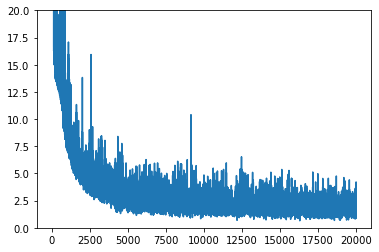

In [74]:
plt.plot(BestModel_temp.history['mape'])
plt.ylim(0,20)

In [75]:
for F in range(Fold):
    s = "Model_Fold%d = keras.models.load_model('D:/testoneblow/ANN_prediction2.0/slope label/k-fold/BestModel_M1_Fold%d.h5')"%(F+1,F+1)
    exec(s)
    

In [76]:
for F in range (Fold):
    s1 = "real = ((ValidLabel_Fold%d)-0.5)*dist_value+min_value"%(F+1)
    exec(s1)
    s2 = "predict = (Model_Fold%d.predict(ValidData_Fold%d)-0.5)*dist_value+min_value"%(F+1,F+1)
    exec(s2)
    s3 = 'Result_Fold%d =  pd.DataFrame(np.concatenate((real,predict), axis = 1))'%(F+1)
    exec(s3)

In [77]:
for F in range (Fold):
    s1 = "real = ValidLabel_Fold%d"%(F+1)
    exec(s1)
    s2 = "predict = Model_Fold%d.predict(ValidData_Fold%d)"%(F+1,F+1)
    exec(s2)
    s3 = 'Result_Fold%d =  pd.DataFrame(np.concatenate((real,predict), axis = 1))'%(F+1)
    exec(s3)

In [78]:
Result_Fold1

,0,1
0,0.921096,0.844537
1,1.444375,1.181720
2,0.609967,0.710843
3,0.916792,0.822766
4,1.048578,1.078977
5,0.968508,0.968303
6,1.388898,0.907679
7,1.079029,0.868621
8,0.700001,0.672376
9,1.128705,0.910424


In [79]:
np.abs(0.481817-0.476687)

0.005129999999999968

In [80]:
real = ((ValidLabel_Fold1)-0.5)*dist_value+min_value

In [81]:
(Model_Fold4.evaluate(ValidData_Fold4,ValidLabel_Fold4))

1/1 [==============================] - 0s 121ms/step - loss: 0.1334 - mse: 0.0347 - mae: 0.1334 - mape: 13.7019


[0.13341251015663147,
 0.03465316444635391,
 0.13341251015663147,
 13.701913833618164]

In [82]:
Error = pd.DataFrame(((Result_Fold1.iloc[:,0]-Result_Fold1.iloc[:,1])/Result_Fold1.iloc[:,0])*100)
absError = np.abs(Error)
Result1 = pd.DataFrame(np.concatenate((Result_Fold1,Error,absError),axis = 1))
Result1

,0,1,2,3
0,0.921096,0.844537,8.311691,8.311691
1,1.444375,1.181720,18.184696,18.184696
2,0.609967,0.710843,-16.537954,16.537954
3,0.916792,0.822766,10.256070,10.256070
4,1.048578,1.078977,-2.899052,2.899052
5,0.968508,0.968303,0.021212,0.021212
6,1.388898,0.907679,34.647570,34.647570
7,1.079029,0.868621,19.499828,19.499828
8,0.700001,0.672376,3.946441,3.946441
9,1.128705,0.910424,19.339006,19.339006


In [83]:
np.mean(np.abs(Result1.iloc[:,2]))

13.929683995651445

In [84]:
for F in range (Fold):
    exec("MAE = pd.DataFrame(np.abs(Result_Fold%d.iloc[:,0]-Result_Fold%d.iloc[:,1]))"%(F+1,F+1))
    s1 = 'Error = pd.DataFrame(((Result_Fold%d.iloc[:,0]-Result_Fold%d.iloc[:,1])/Result_Fold%d.iloc[:,0])*100)'%(F+1,F+1,F+1)
    exec(s1)
    s2 = 'Result%d = pd.DataFrame(np.concatenate((Result_Fold%d,Error,np.abs(Error),MAE),axis = 1))'%(F+1,F+1)
    exec(s2)
    s3 = "Result%d.to_csv('D:/testoneblow/ANN_prediction2.0/slope label/k-fold/Result%d.csv')"%(F+1,F+1)
    exec(s3)


In [85]:
average_Error_Fold = []
Max_Error_Fold = []
for F in range(Fold):
    exec("a = np.mean(Result%d.iloc[:,3])"%(F+1))
    average_Error_Fold = np.append(average_Error_Fold,a)
    exec("b = np.max(Result%d.iloc[:,3])"%(F+1))
    Max_Error_Fold = np.append(Max_Error_Fold,b)

In [86]:
average_Error_Fold

array([13.929684  , 16.89155528, 13.42909917, 13.70191417, 18.23708351])

In [87]:
average_Error = np.mean(average_Error_Fold)
average_Error

15.237867225074515

In [88]:
Max_Error_Fold

array([34.64756991, 43.25715303, 54.07694749, 38.33304772, 42.3762627 ])